In [337]:
import pandas as pd

### 데이터 프레임의 결합

1. 단순 결합 (union결합)
    - 단순하게 행을 추가하거나, 열을 추가하여 데이터프레임을 결합
    - concat() 함수를 사용하여 데이터프레임을 결합
    - 매개변수 axis : 행 결합 or 열 결합 지정
    - 매개변수 ignore_index : 데이터프레임 결합 후, 인덱스 초기화 여부 지정(행을 추가할때만 가능)

2. 특정조건에 맞게 데이터 결합 (join결합)
    - 데이터프레임의 특정한 조건이 참이면 결합하는 형태
    - merge() : 열을 추가하는 함수
    - 매개변수 on : 특정한 조건 지정 
    - 매개변수 how : (left, right, inner, full) 데이터 프레임의 기준을 지정 , inner 교집합, outer 합집합



In [338]:
# 데이터 프레임 생성 

df = pd.DataFrame({
    'S1' : [1,2,3,4],
    'S2' : [5,6,7,8]
})

df

,S1,S2
0,1,5
1,2,6
2,3,7
3,4,8


In [339]:
df2 = pd.DataFrame([1,2])

df2

,0
0,1
1,2


In [340]:
# df1 & df2 비교
# index는 0과 1 동일, columns 는 같은게 전혀 없엉

In [341]:
# concat() 함수를 이용하여 데이터 프레임을 결합 
# 단순 & 행 추가

# pd.concat([df, df2], axis = 0)  # axis = "rows"  라 써도 똑같음

# df 와 df2의 컬럼이 달라. 근데 일단 합치래니까 
# 행을 추가하고 df2를 위한 columns도 추가가 되고, 그 외는 NaN
# df와 df2 자리 바뀌면 결과 순서도 달라짐

pd.concat([df, df2], axis = 0, ignore_index= True)  # 인덱스 초기화 -> reset_index 도 가능 
# pd.concat([df, df2], axis = 0).reset_index(drop=True)  # 이런식으로

,S1,S2,0
0,1.0,5.0,NaN
1,2.0,6.0,NaN
2,3.0,7.0,NaN
3,4.0,8.0,NaN
4,NaN,NaN,1.0
5,NaN,NaN,2.0


In [342]:
df3 = pd.DataFrame({
    'S1' : [1,2],

})

df3

,S1
0,1
1,2


In [343]:
pd.concat([df,df3], axis=0)  # 컬럼 동일 -> additional 컬럼 X 

,S1,S2
0,1,5.0
1,2,6.0
2,3,7.0
3,4,8.0
0,1,NaN
1,2,NaN


In [344]:
df2.index = [6,7]

In [345]:
# 단순 & 열 결합
# ignore_index = True 추가하면, 열추가라 상관없을 것 같은데 컬럼 이름 바뀜 0,1,2 로

pd.concat([df, df2], axis = 1)

,S1,S2,0
0,1.0,5.0,NaN
1,2.0,6.0,NaN
2,3.0,7.0,NaN
3,4.0,8.0,NaN
6,NaN,NaN,1.0
7,NaN,NaN,2.0


In [346]:
pd.concat([df, df3], axis = 1)

,S1,S2,S1
0,1,5,1.0
1,2,6,2.0
2,3,7,NaN
3,4,8,NaN


In [347]:
pd.concat([df, df2, df3], axis =0)

,S1,S2,0
0,1.0,5.0,NaN
1,2.0,6.0,NaN
2,3.0,7.0,NaN
3,4.0,8.0,NaN
6,NaN,NaN,1.0
7,NaN,NaN,2.0
0,1.0,NaN,NaN
1,2.0,NaN,NaN


In [348]:
# merge() 
# 특정조건ㅇ 맞춰 열을 추가하는 함수

df = pd.DataFrame({
    'id' : [1,2,3,4,5],
    'item' : ['a', 'b', 'a', 'a', 'b']
})

df2 = pd.DataFrame({
    'id' : [1,4,5,2,3],
    'name' : ['kim', 'lee', 'park', 'choi', 'ha']
})

In [349]:
df

,id,item
0,1,a
1,2,b
2,3,a
3,4,a
4,5,b


In [350]:
df2

,id,name
0,1,kim
1,4,lee
2,5,park
3,2,choi
4,3,ha


In [351]:
# 비교용 단순결합

pd.concat([df, df2], axis = 1)

,id,item,id,name
0,1,a,1,kim
1,2,b,4,lee
2,3,a,5,park
3,4,a,2,choi
4,5,b,3,ha


In [352]:
pd.merge(df, df2, on = 'id', how = 'left' )  

# 매개변수 on  :  두개의 데이터프레임 중 같은 컬럼을 가지고 있다면 그 컬럼이름 적어줘야

# 결과, df2의 id 컬럼 없어지고, name은 '없어진id'가 합쳐지므로 합쳐진 기준df의 id 컬럼 순서대로 바뀜

,id,item,name
0,1,a,kim
1,2,b,choi
2,3,a,ha
3,4,a,lee
4,5,b,park


In [353]:
pd.merge(df,df2, on = 'id', how = 'right')

,id,item,name
0,1,a,kim
1,4,a,lee
2,5,b,park
3,2,b,choi
4,3,a,ha


In [354]:
pd.merge(df,df2, on = 'id', how = 'inner')

,id,item,name
0,1,a,kim
1,2,b,choi
2,3,a,ha
3,4,a,lee
4,5,b,park


In [355]:
pd.merge(df,df2, on = 'id', how = 'outer')

,id,item,name
0,1,a,kim
1,2,b,choi
2,3,a,ha
3,4,a,lee
4,5,b,park


In [356]:
df3 = pd.DataFrame({
    'item' : ['a', 'b', 'c'],
    'price' : [100, 200, 300]
})

df3

,item,price
0,a,100
1,b,200
2,c,300


In [357]:
pd.merge(df,df3, on='item', how= 'left') # 기준이 되는df에 c 가 없어서 df3의 c 값은 아예 뜨지도 않아

,id,item,price
0,1,a,100
1,2,b,200
2,3,a,100
3,4,a,100
4,5,b,200


In [358]:
pd.merge(df,df3, on='item', how= 'right') # right이니까 기준이되는 건 df3 -> 그러니 c가 나온당

,id,item,price
0,1.0,a,100
1,3.0,a,100
2,4.0,a,100
3,2.0,b,200
4,5.0,b,200
5,NaN,c,300


In [359]:
# df의 value하나를 바꿔보자 
# 그 값만 설정하고 = 로 새로운값 덮어씌어

df.loc[3, 'item'] = 'd'
df

,id,item
0,1,a
1,2,b
2,3,a
3,4,d
4,5,b


In [360]:
pd.merge(df, df3, on = 'item', how= 'left')

,id,item,price
0,1,a,100.0
1,2,b,200.0
2,3,a,100.0
3,4,d,NaN
4,5,b,200.0


In [361]:
pd.merge(df, df3, on = 'item', how= 'right')

,id,item,price
0,1.0,a,100
1,3.0,a,100
2,2.0,b,200
3,5.0,b,200
4,NaN,c,300


In [362]:
pd.merge(df, df3, on = 'item', how= 'inner')

,id,item,price
0,1,a,100
1,3,a,100
2,2,b,200
3,5,b,200


In [363]:
pd.merge(df, df3, on = 'item', how= 'outer')

,id,item,price
0,1.0,a,100.0
1,3.0,a,100.0
2,2.0,b,200.0
3,5.0,b,200.0
4,4.0,d,NaN
5,NaN,c,300.0


## 특정한 경로에 있는 파일의 목록 출력
___

In [364]:
import os 

In [365]:
file_list = os.listdir("../csv/2017/")  # listdir : directory를 받아와서 리스트 형태로 만들어주는 함수

In [366]:
import pandas as pd

In [367]:
for i in range(1,13,1) :
    a = '%02d'%i
    file = '2017'+a+'_expense_list.csv'
    print(file)

201701_expense_list.csv
201702_expense_list.csv
201703_expense_list.csv
201704_expense_list.csv
201705_expense_list.csv
201706_expense_list.csv
201707_expense_list.csv
201708_expense_list.csv
201709_expense_list.csv
201710_expense_list.csv
201711_expense_list.csv
201712_expense_list.csv


In [368]:
#read_csv() 안에 들어가는 인자값을 생성
#상대경로 : '../csv/2017/파일명' -> 12개 출력해야
    # 상대경로도 문자열이니까 print() 할때도 공통적인 상대경로 '../~2017/'앞에 추가하면 되겠징
# 경로에 있는 파일들을 pandas를 통해 데이터프레임으로 불러와
# concat을 이용하여 단순하게 행을 추가하는 결합 해보자
# 결합을 하려면 기준이 되는 데이터 프레임 하나가 있어야 함.  for문
# 비어있는 데이터프레임을 하나 생성해야해


path = '../csv/2017/'
file_list = os.listdir(path)
result = pd.DataFrame()  # dataframe만들었는데 ()안에 아무것도 안쓰면, 비어있는 데이터프레임 만들어짐



for i in file_list :
    # print(path+i)
    df = pd.read_csv(path+i)
    result = pd.concat([result,df], axis = 0, ignore_index= True)

result.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70132 entries, 0 to 70131
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                70132 non-null  int64  
 1   title              70132 non-null  object 
 2   url                70132 non-null  object 
 3   dept_nm_lvl_1      70132 non-null  object 
 4   dept_nm_lvl_2      70074 non-null  object 
 5   dept_nm_lvl_3      61262 non-null  object 
 6   dept_nm_lvl_4      17939 non-null  object 
 7   dept_nm_lvl_5      3474 non-null   object 
 8   exec_yr            70132 non-null  int64  
 9   exec_month         70132 non-null  int64  
 10  expense_budget     3108 non-null   float64
 11  expense_execution  2805 non-null   float64
 12  category           1259 non-null   object 
 13  dept_nm_full       70053 non-null  object 
 14  exec_dt            70132 non-null  object 
 15  exec_loc           69360 non-null  object 
 16  exec_purpose       701

In [369]:
## 해보셈. 2019 json 파일 

_file_list =os.listdir("../csv/2019/")

In [370]:
path = '../csv/2019/'
_file_list = os.listdir(path)
_result = pd.DataFrame()

for i in _file_list : 
    # print(path+i)
    _df = pd.read_json(path+i)
    _result = pd.concat([_result, _df], axis =0, ignore_index =  True)

_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74207 entries, 0 to 74206
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                74207 non-null  int64  
 1   title              74207 non-null  object 
 2   url                74207 non-null  object 
 3   dept_nm_lvl_1      74207 non-null  object 
 4   dept_nm_lvl_2      74207 non-null  object 
 5   dept_nm_lvl_3      74207 non-null  object 
 6   dept_nm_lvl_4      74207 non-null  object 
 7   dept_nm_lvl_5      74207 non-null  object 
 8   exec_yr            74207 non-null  int64  
 9   exec_month         74207 non-null  int64  
 10  expense_budget     2075 non-null   float64
 11  expense_execution  1598 non-null   float64
 12  category           74028 non-null  object 
 13  dept_nm_full       74207 non-null  object 
 14  exec_dt            74207 non-null  object 
 15  exec_loc           74207 non-null  object 
 16  exec_purpose       742

In [371]:
os.listdir('../csv/2020/')

['202001_expense_list.xlsx',
 '202002_expense_list.xlsx',
 '202003_expense_list.xlsx',
 '202004_expense_list.xlsx',
 '202005_expense_list.xlsx',
 '202006_expense_list.xlsx',
 '202007_expense_list.xlsx',
 '202008_expense_list.xlsx',
 '202009_expense_list.xlsx',
 '202010_expense_list.xlsx',
 '202011_expense_list.xlsx',
 '202012_expense_list.xlsx']

In [372]:
# 해보자2020 엑셀

path_ = '../csv/2020/'
file_list_ = os.listdir(path_)
result_ = pd.DataFrame()

for i in file_list_ :
    df_ = pd.read_excel(path_+i)
    result_ = pd.concat([result_, df_], axis = 0, ignore_index=True)

result_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70862 entries, 0 to 70861
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                70862 non-null  int64  
 1   title              70862 non-null  object 
 2   url                70862 non-null  object 
 3   dept_nm_lvl_1      70862 non-null  object 
 4   dept_nm_lvl_2      70862 non-null  object 
 5   dept_nm_lvl_3      55593 non-null  object 
 6   dept_nm_lvl_4      18992 non-null  object 
 7   dept_nm_lvl_5      1601 non-null   object 
 8   exec_yr            70862 non-null  int64  
 9   exec_month         70862 non-null  int64  
 10  expense_budget     1823 non-null   float64
 11  expense_execution  1338 non-null   float64
 12  category           2123 non-null   object 
 13  dept_nm_full       70862 non-null  object 
 14  exec_dt            70862 non-null  object 
 15  exec_loc           70278 non-null  object 
 16  exec_purpose       708

In [373]:
# csv, json, excel 의 여러 파일들 결합하는거 해봣자나 이제 파일 형식 뭐든 상관없이 할 수 있게 해보자
# 이것들을 자동화 해보자잇

# 함수 생성 
# 매개변수 -> path, 파일형태 

file_list = os.listdir("../csv/2022")
a = '.xlsx'

for i in file_list :
    # print(i.endswith(a))
    if i.endswith(a) : 
        print(i)


202202_expense_list.xlsx
202203_expense_list.xlsx
202204_expense_list.xlsx
202205_expense_list.xlsx


In [374]:
# 함수의 형태로 폴더에 있는 파일들 결합하는 함수 생성

def list_load(_dir, _end) : 
    # 매개변수 2개 생성 : dir -> 파일의 경로 (마지막에 / 붙이는거 주의)
                        # _end -> 파일의 확장자 (처음에 . 붙이는거 주의)

    if ~(_dir.endswith('/')) :
        _dir = _dir + '/'

    if _end[0] != '.' :
        _end = '.' + _end

    #print(_dir, _end)


    #파일의 리스트를 호출 
    file_list = os.listdir(_dir)
    # print(file_list)

    # 비어있는 데이터 프레임 생성
    result = pd.DataFrame()
    
    #파일 리스트 중 확장자가 같은 파일들만 결합 
    for i in file_list : 
        # 파일명의 확장자라는 인자값과 같은 경우
        if i.endswith(_end) : 
            print(i)
            #확장자에 따른 read함수 설정
            if _end == '.csv' :
                    df = pd.read_csv(_dir + i)
                    result = pd.concat([result, df], axis = 0, ignore_index = True)

            elif _end == '.json' :
                    df = pd.read_json(_dir + i) 
                    result = pd.concat([result, df], axis = 0, ignore_index = True)

            # elif (_end == '.xls') or (_end == '.xlsx') :   #2개일때는 이렇게 쓰면 되는데
            elif _end in ['.xlsx', '.xls'] :  # 그 이상 여러개일때는, 이게 더 편하다 
                    df = pd.read_excel(_dir+i)
                    result = pd.concat([result, df], axis = 0, ignore_index= True)
            else :
                return "지원하지 않는 확장자입니다."
    return result


In [375]:


list_load('../csv/2022', '.csv')

202202_expense_list.csv
202203_expense_list.csv
202204_expense_list.csv
202205_expense_list.csv


,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,25844143,2022년 2월 사업소 도로사업소 서부도로사업소 업무추진비 - 기관운영 시책추진 부서운영,http://opengov.seoul.go.kr/expense/25844143,사업소,도로사업소,서부도로사업소,NaN,NaN,2022,2,0,0,NaN,서부도로사업소 기전과,2022-02-11 14:52,다농마트(마포구 월드컵로 235),부서운영 물품구입,기전과장 외 48명,제로페이,230630
1,25844143,2022년 2월 사업소 도로사업소 서부도로사업소 업무추진비 - 기관운영 시책추진 부서운영,http://opengov.seoul.go.kr/expense/25844143,사업소,도로사업소,서부도로사업소,NaN,NaN,2022,2,0,0,NaN,서부도로사업소 시설보수과,2022-02-14 09:58,다농마트(마포구 월드컵로),부서운영물품 구입(공무직),김민철 등 3명,카드,120600
2,25844143,2022년 2월 사업소 도로사업소 서부도로사업소 업무추진비 - 기관운영 시책추진 부서운영,http://opengov.seoul.go.kr/expense/25844143,사업소,도로사업소,서부도로사업소,NaN,NaN,2022,2,0,0,NaN,서부도로사업소 도로보수과,2022-02-22 14:53,다농마트(마포구 월드컵로),도로보수과 직원 물품구매,윤옥광외 9명,제로페이,112350
3,25844143,2022년 2월 사업소 도로사업소 서부도로사업소 업무추진비 - 기관운영 시책추진 부서운영,http://opengov.seoul.go.kr/expense/25844143,사업소,도로사업소,서부도로사업소,NaN,NaN,2022,2,0,0,NaN,서부도로사업소 도로보수과,2022-02-21 14:33,에이스문구센터(서대문구 연희로),도로보수과 직원 물품구매,윤옥광외 9명,제로페이,12120
4,25844143,2022년 2월 사업소 도로사업소 서부도로사업소 업무추진비 - 기관운영 시책추진 부서운영,http://opengov.seoul.go.kr/expense/25844143,사업소,도로사업소,서부도로사업소,NaN,NaN,2022,2,0,0,NaN,서부도로사업소,2022-02-28 12:21,시골보쌈&감자옹심이(마포구 월드컵북로),과적단속 현장근무자 격려 간담회,김영철 등 5명,제로페이,68000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,26047684,2022년 5월 사업소 중부공원녹지사업소 시설과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/expense/26047684,사업소,중부공원녹지사업소,시설과,NaN,NaN,2022,5,0,0,NaN,시설과,2022-05-25 11:00,㈜그린주의(중량구 봉화산로123),부서운영 및 민원접대 물품구입(커피 및 다과),시설과장외 14명,카드,355600
19350,25993976,2022년 5월 사업소 서울역사박물관 학예연구부 유물관리과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/expense/25993976,사업소,서울역사박물관,학예연구부,유물관리과,NaN,2022,5,0,0,NaN,유물관리과,2022-05-17 15:41,광화문홈플러스(종로구 새문안로 91),부서운영에 필요한 물품구입(차종류 등),유물관리과장 강성희 등 9명,카드,175000
19351,25974709,2022년 5월 사업소 도시기반시설본부 시설국 안전관리과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/expense/25974709,사업소,도시기반시설본부,시설국,안전관리과,NaN,2022,5,0,0,NaN,도시기반시설본부 안전관리과,2022-05-12 12:30,손가명가,안전관리방안 모색을 위한 간담회 개최,안전관리과장 외 8명,제로페이,250000
19352,25947326,2022년 5월 사업소 서울역사박물관 학예연구부 교육대외협력과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/expense/25947326,사업소,서울역사박물관,학예연구부,교육대외협력과,NaN,2022,5,0,0,NaN,서울역사박물관 교육대외협력과,2022-05-10 15:29,홈플러스 익스프레스 광화문점 (서울시 종로구 새문안로 91),교육대외협력과 부서운영물품 구매비,교육대외협력과장 등 7명,카드,175000


In [376]:
# 지금까지 한거 모듈로 저장 해써 
# __init__ 으로
# 이거 불러와서 잘되는지 확인해볼까

import list_load as ll
import imp    # 모듈 .py 파일 수정하면 imp.reload(ll) 이거 해줘야하는데, 이를 위한 imp 모듈을 불러와야해
                # imp는 모듈 관련 작업하기 위한 파이썬 내장모듈이래
imp.reload(ll)

<module 'list_load' from 'c:\\Users\\zino0\\Documents\\GitHub\\Practice_ubion\\Code_Moon\\230406\\list_load\\__init__.py'>

In [377]:
ll.load('../csv/2017')

201701_expense_list.csv
201702_expense_list.csv
201703_expense_list.csv
201704_expense_list.csv
201705_expense_list.csv
201706_expense_list.csv
201707_expense_list.csv
201708_expense_list.csv
201709_expense_list.csv
201710_expense_list.csv
201711_expense_list.csv
201712_expense_list.csv


,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000
2,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000
3,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000
4,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70127,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-15 16:40,보리네생고깃간(서오릉로 12),지역정신보건기관 업무협의 간담회,병원장 외 4명,카드,112000
70128,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-12 20:39,항아리홍어(불광동 281-159),원무과 현안업무 추진직원 격려 간담회,원무과장 외 4명,카드,118000
70129,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-04 21:17,횟집산이네(백련산로 160),18년 예산편성 관련 직원 격려 간담회,서무팀장 외 5명,카드,124000
70130,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-05 18:21,삿뽀로(서오릉로 4),인증 관련업무 직원 격려 간담회,병원장 외 33명,카드,820000


## 예제

1. csv 폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, trand_d_2)
2. tran_1과 tran_2는 단순한 행 추가 결함(유니언 결합)
3. tran_d_1과 tran_d_2도 유니언 결합
4. 2번, 3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰서 2번 데이터프레인 기준으로 열 추가 결합(조인결합)
5. csv폴더에 있는 2개의 파일 로드 (custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 나온 데이터프레임과 item_master 조인 결합
8. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price라는 파생변수를 생성 (total_price = item_price * quantity)

추가
- total_price 가장 높은 item_name 출력하기 
- 

In [378]:
a = pd.read_csv('../csv/tran_1.csv')
b = pd.read_csv('../csv/tran_2.csv')
c = pd.read_csv('../csv/tran_d_1.csv')
d = pd.read_csv('../csv/tran_d_2.csv')



In [379]:
_union1 = pd.concat([a,b], axis = 0, ignore_index=True)

In [380]:
_union2 = pd.concat([c,d], axis = 0, ignore_index=True)

In [381]:
# _union1 기준으로 조인결합 

_merge1 = pd.merge(_union1, _union2, on = 'transaction_id', how = 'left')

_merge1.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [382]:
# 파일 로드 

e = pd.read_csv('../csv/customer_master.csv')
f = pd.read_csv('../csv/item_master.csv')

f.columns

Index(['item_id', 'item_name', 'item_price'], dtype='object')

In [383]:
# _merge1 에 e 조인결합

_merge2 = pd.merge(_merge1, e, on = 'customer_id', how = 'left')

_merge2.columns


Index(['transaction_id', 'price', 'payment_date', 'customer_id', 'detail_id',
       'item_id', 'quantity', 'name', 'class', 'gender', 'start_date',
       'end_date', 'campaign_id', 'is_deleted'],
      dtype='object')

In [384]:
# _merge2 기중 f 조인결합

_merge3 = pd.merge(_merge2, f, on ='item_id', how = 'left' )

_merge3.columns

Index(['transaction_id', 'price', 'payment_date', 'customer_id', 'detail_id',
       'item_id', 'quantity', 'name', 'class', 'gender', 'start_date',
       'end_date', 'campaign_id', 'is_deleted', 'item_name', 'item_price'],
      dtype='object')

In [385]:
# 파생변수 

#  quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price

# 여기까지.. ㅜㅜ zn

In [386]:
# Moon_Sol

import pandas as pd

In [387]:
tran1 = pd.read_csv('../csv/tran_1.csv')
tran2 = pd.read_csv('../csv/tran_2.csv')
trand1 = pd.read_csv('../csv/tran_d_1.csv')
trand2 = pd.read_csv('../csv/tran_d_2.csv')


In [388]:
# tran1 & tran2 유니언 결합

tran = pd.concat([tran1,tran2], axis = 0, ignore_index= True)



In [389]:
# trand1 & trand2 유니언 결합

trand = pd.concat([trand1,trand2], axis = 0, ignore_index= True)



In [390]:
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [391]:
trand.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [392]:
# tran & trand 공통 컬럼 찾았으니, 그걸 기준으로 조인 결합
# 조건 on = 'transaction_id', how = tran

tran = pd.merge(tran,trand, on = 'transaction_id', how = 'left')
tran.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [393]:
# 2개 파일을 로드 

customer_master = pd.read_csv('../csv/customer_master.csv')
item_master = pd.read_csv('../csv/item_master.csv')


In [394]:
# tran, customer_master 조인 결합 ( 조건 : customer_id, how : inner or left)

total_df = pd.merge(tran, customer_master, on = 'customer_id', how = 'inner')

In [395]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0


In [396]:
# total_df 와 item_master 조인결합 (조건 : item_id, how : inner)

total_df = pd.merge(total_df, item_master, on = 'item_id', how = 'inner')


In [397]:
# 새로운 파생변수 생성 total_price

# total_df['total_price'] = values

total_df['total_price'] = total_df['item_price'] * total_df['quantity']

In [398]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [399]:
# 거래의 금액이 가장 좋은 아이템은 무엇인가
# groupby(~)  ~ 기준으로 그룹화
group_data = total_df[['item_name','total_price']].groupby('item_name').sum()


In [400]:
#내림차순 정렬 


group_data.sort_values('total_price', ascending= False).index[0]

'PC-E'

In [401]:
# gender컬럼의  value들 m과 f 각각 바꾸기 : m -> 남자, f -> 여자
# total_df['gender']
origin_data = total_df.copy()

In [402]:
#loc 이용하여 m,f 변경

total_df.loc[total_df['gender'] == 'M', 'gender'] = '남자'
total_df.loc[total_df['gender'] == 'F', 'gender'] = '여자'

In [403]:
total_df['gender'].value_counts()

남자    3268
여자    2801
Name: gender, dtype: int64

In [404]:
total_df = origin_data.copy()

In [405]:
total_df['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [406]:
# apply() 사용하여 M->남자 , F -> 여자 
# apply()  앞에있는 시리즈 형태의 values 값 하나하나씩 가져오는 함수


def change(x) :
    # x 에는 M 아니면 F
    if x == 'F':
        result = '여자'
    else :
        result = '남자'
    return result


total_df['gender'].apply(change)

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [407]:
# apply() 도 위처럼 함수 생성해서 쓰는 방법이랑, lambda 쓰는 법 있자나
# if 문 한 줄로 써야겠지, lambda는 한줄로 쓰려고 하는거자나
# 참일때 결과 먼저 써주고 거짓 결과값
# 만일 elif 쓰고 싶으면 맨뒤에 
# elif 는 if가 거짓일때 자나 그래서 else 뒤에

# total_df['gender'].apply(lambda x : "남자" if (x == 'M') else "여자" ) 이건 if ,else까지


#elif 쓴거랑 똑같지만 형태는 if ~ else(if ~ else) . 
total_df['gender'].apply(lambda x : "남자" if (x == 'M') else ("여자" if (x == 'F') else "무응답"))

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [408]:
# payment_date 컬럼을 시계열데이터 변경 
# to_datetime() 

total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [409]:
total_df['payment_date'] = pd.to_datetime(total_df['payment_date'], format = '%Y-%m-%d %H:%M:%S')

In [410]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  6069 non-null   object        
 1   price           6069 non-null   int64         
 2   payment_date    6069 non-null   datetime64[ns]
 3   customer_id     6069 non-null   object        
 4   detail_id       6069 non-null   int64         
 5   item_id         6069 non-null   object        
 6   quantity        6069 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   int64         
 14  item_name       6069 non-null   object        
 15  item

In [411]:
# 시계열 데이터에서 월-년 추출해서 새로운 파생변수 payment_month 칼럼 만들어보자
# .dt : 앞에꺼 datetime 유형 데이터 뽑고
# strftime : 시계열 데이터를 문자 형태로 바꿔주는 함수 
    #문자형태로 바꿔줘야 자리를 바꾸든 뭐하든 할 수 있음 시계열데이터는 설정한 형식을 벗어나지 못함

total_df['payment_month'] = total_df['payment_date'].dt.strftime('%m-%Y')





In [412]:
total_df

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000,04-2019
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000,04-2019
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,T0000006675,120000,2019-07-26 04:57:13,GD139734,6910,S003,1,XXXX,C03,M,2018-10-01 00:00:00,NaN,CA1,0,PC-C,120000,120000,07-2019
6065,T0000006751,120000,2019-07-28 10:14:39,PL988722,6989,S003,1,XXX,C03,M,2017-02-01 00:00:00,NaN,CA1,0,PC-C,120000,120000,07-2019
6066,T0000006757,120000,2019-07-28 11:23:32,HI015767,6995,S003,1,XXXXX,C03,M,2015-12-01 00:00:00,NaN,CA1,0,PC-C,120000,120000,07-2019
6067,T0000006835,240000,2019-07-30 11:08:09,HI555356,7078,S003,2,XXXXX,C02,M,2018-07-11 00:00:00,2019-03-31 00:00:00,CA1,1,PC-C,120000,240000,07-2019


In [413]:
# 월별 거래량을 확인 
# groupby(~).sum() : ~ 들이 같은것들이 여러개 있는데 각각을 더해줄거야

group_data = total_df[['total_price','payment_month']].groupby('payment_month').sum() 
group_data

,total_price
payment_month,
02-2019,136905000
03-2019,135695000
04-2019,135970000
05-2019,132750000
06-2019,138870000
07-2019,145850000


<Axes: xlabel='payment_month'>

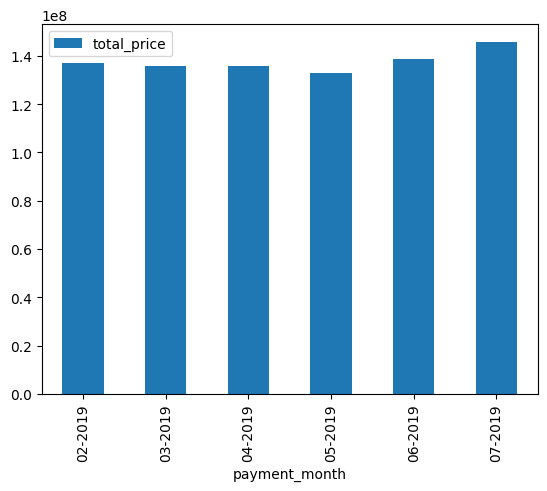

In [416]:
group_data.plot.bar()

In [426]:
# 엑셀 피벗 

pivot_data = pd.pivot_table(
    total_df,
    index = 'payment_month', 
    aggfunc= ['sum', 'mean', 'min', 'max', 'std'],
    values= 'total_price'
)

pivot_data

,sum,mean,min,max,std
,total_price,total_price,total_price,total_price,total_price
payment_month,,,,,
02-2019,136905000,137592.964824,50000,420000,68848.024325
03-2019,135695000,135154.382470,50000,420000,69144.112878
04-2019,135970000,136106.106106,50000,420000,69473.778972
05-2019,132750000,133551.307847,50000,420000,68905.731855
06-2019,138870000,135747.800587,50000,420000,67480.539578
07-2019,145850000,138377.609108,50000,420000,68827.693467


<Axes: xlabel='payment_month'>

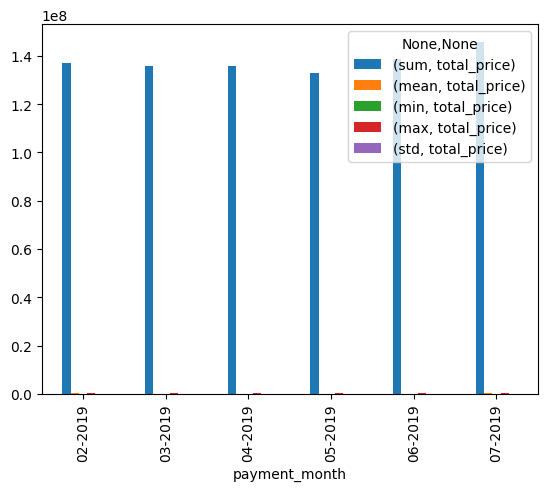

In [427]:
pivot_data.plot.bar()

In [428]:
# groupby 에서도 
group_data = total_df[['total_price','payment_month']].groupby('payment_month').agg(['mean','sum'])

<Axes: xlabel='payment_month'>

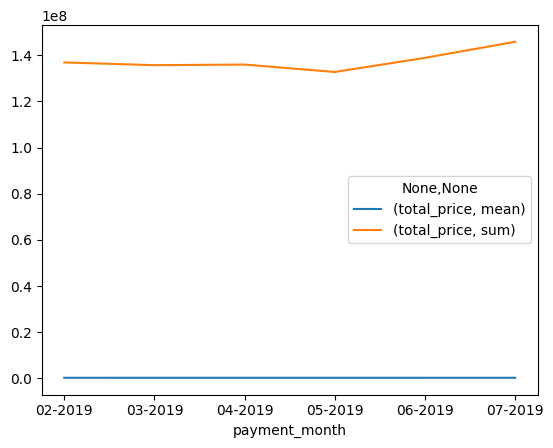

In [430]:
group_data.plot()